# Regresion Lineal VS Regresion con Procesos Gaussianos (RBF kernel)

Los datos en el archivo tarea13.xls tienen datos para ajustar dos modelos, el primero tiene una variable respuesta y una variable explicativa y el segundo una variable respuesta y dos explicativas. La idea es ajustar un modelo lineal, ver qué nos sugiere el análisis post ajuste; ajustar un modelo de regresión no paramétrica y con los resultados de estos dos ajustar un modelo de regresión no lineal.

***Parte 1: Modelo lineal***

La base contiene dos tablas de datos, las cuales son separadas para llevar a cabo los análisis. La primera tabla contiene una variable predictora y una respuesta. La segunda tabla incluye dos predictores y una respuesta. Todas las variables son numericas y ambas tablas están formadas por 30 observaciones.

In [9]:
#paquetes
library(ggplot2)
library(dplyr)
library(gridExtra)
library(lmtest)
library(nortest)
library(scatterplot3d)
library(MASS)
options(repr.plot.width=6, repr.plot.height=4)

In [354]:
#leer datos
datos = read.csv("tarea13.csv")
colnames(datos)[1] = "x"
datos1 = datos[c("x","y")] %>% na.omit
datos2 = datos[c("y1","x1","x2")] %>% na.omit %>% rename(y=y1) %>% dplyr::select(x1,x2,y)

In [284]:
glimpse(datos1)

Rows: 30
Columns: 2
$ x <dbl> 0.088502815, 0.493304789, 0.706705809, 0.514427955, 0.296841547, ...
$ y <dbl> 2.534822, 6.020681, 9.526898, 6.225583, 3.664876, 7.534283, 3.767...


In [285]:
glimpse(datos2)

Rows: 30
Columns: 3
$ x1 <dbl> 0.23986561, 0.38336039, 0.70621908, 0.29023028, 0.57215205, 0.80...
$ x2 <int> 10, 1, 10, 6, 3, 3, 1, 6, 10, 2, 2, 9, 7, 9, 5, 2, 5, 8, 1, 1, 9...
$ y  <dbl> 22031.201160, 10.178685, 22052.635240, 408.641130, 35.498567, 57...


Para el caso del primer dataset, los datos exhiben un comportamiento suave y con poco ruido. La tendencia no dista tanto de una recta, por lo cual el ajuste resultante no será tan malo.

`geom_smooth()` using formula 'y ~ x'


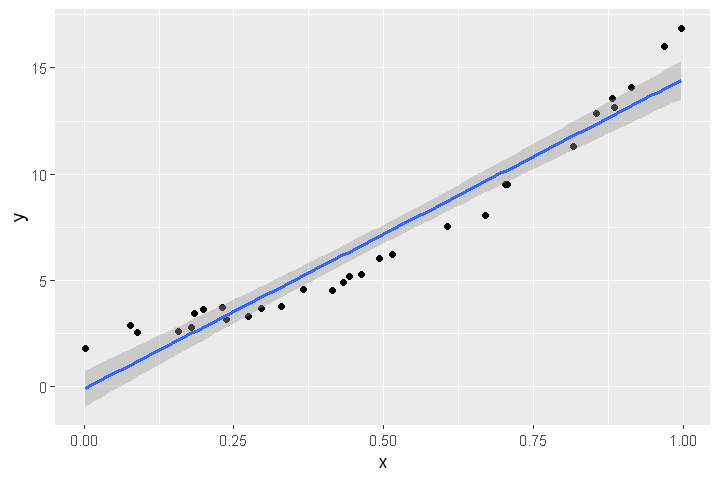

In [17]:
ggplot(datos1,aes(x=x,y=y)) + geom_point() + geom_smooth(method="lm")

El segundo dataset exhibe un comportamiento muy distinto en ambas direcciones. Si bien los graficos de la repuesta contra cada predictor no revelan la forma de la superficie de regresion, sí pueden dar indicios de que un modelo lineal no será el adecuado.

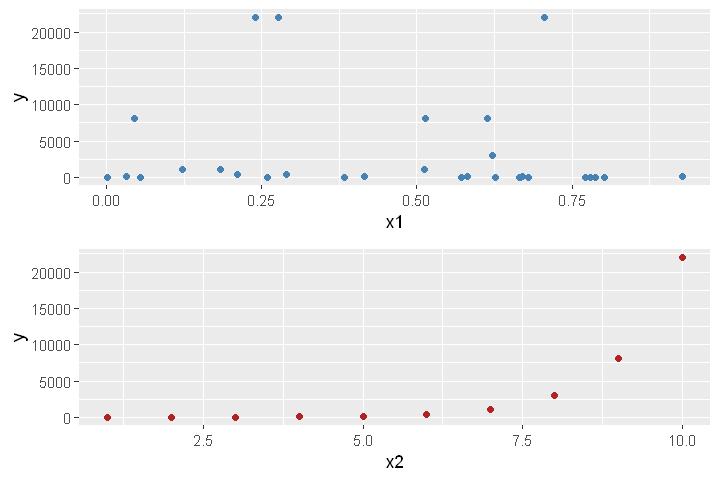

In [18]:
p1 = ggplot(datos2) + geom_point(aes(x=x1,y=y),colour="steelblue")
p2 = ggplot(datos2) + geom_point(aes(x=x2,y=y),colour="firebrick")
grid.arrange(p1,p2,ncol=1)

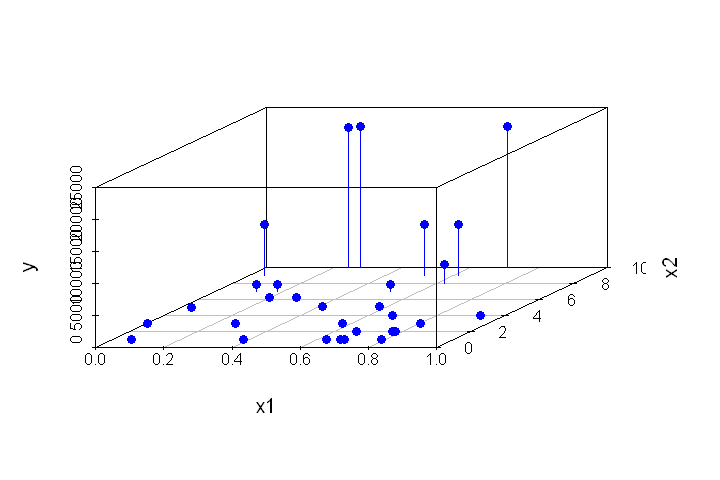

In [19]:
scatterplot3d(datos2,color = "blue",pch = 19,angle = 45,type="h")

Aunque la evidencia gráfica para ambos conjuntos de datos muestra que en menor o mayor grado hay violaciones a la linealidad, se prosigue con el ajuste lineal.

Para el caso de la tabla con un solo predictor, se presenta el resumen del ajuste:

In [20]:
lm1 = lm(y~.,datos1)
summary(lm1)


Call:
lm(formula = y ~ ., data = datos1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6053 -1.0292 -0.3248  0.8324  2.4579 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.1008     0.4118  -0.245    0.808    
x            14.5666     0.7328  19.878   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.176 on 28 degrees of freedom
Multiple R-squared:  0.9338,	Adjusted R-squared:  0.9315 
F-statistic: 395.2 on 1 and 28 DF,  p-value: < 2.2e-16


Encontrando que la regresión es significativa al nivel 0.05 de significancia. Nótese que no se rechaza la hipotesis de que el intercepto sea iguala cero. Esto quiere decir que considerar un modelo sin intercepto es razonable.

In [21]:
lm1_0 = lm(y~x+0,datos1)
summary(lm1_0)


Call:
lm(formula = y ~ x + 0, data = datos1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6035 -1.0608 -0.3449  0.7869  2.5096 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x  14.4136     0.3758   38.35   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.157 on 29 degrees of freedom
Multiple R-squared:  0.9807,	Adjusted R-squared:   0.98 
F-statistic:  1471 on 1 and 29 DF,  p-value: < 2.2e-16


La bondad de ajuste de este modelo es superior y es también un modelo con menor complejidad. Por tanto es el modelo que se retiene.

Las gráficas de diagnóstico muestran una clara evidencia de no linealidad. La existencia de observaciones influeyentes se debe precisamente a que el modelo no captura de forma adecuada la forma de la $f$ que describe la relación $\mathbb{E}(Y)=f(X)$.

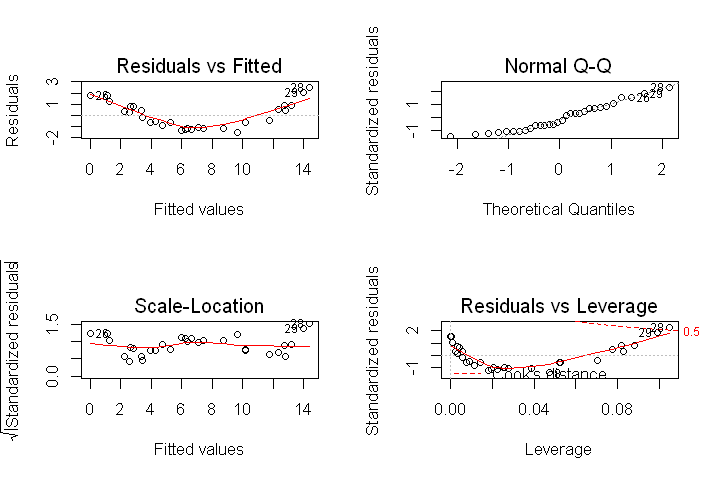

In [23]:
par(mfrow=c(2,2))
plot(lm1_0)

La violación a la homocedasticidad no es tan clara o marcada como la no linealidad. La evidencia de normalidad a traves del qqplot tampoco es tan concluyente. Por ello deben efectuarse pruebas sobre los residuales. También se debe revisar la autocorrelación tanto gráficamente como con una prueba de hipótesis.

In [24]:
shapiro.test(lm1_0$residuals)


	Shapiro-Wilk normality test

data:  lm1_0$residuals
W = 0.93342, p-value = 0.06057


La normalidad no se rechaza al nivel 0.05 de significancia pero el p-value está muy cerca del valor crítico, por lo cual hay que tomar el resultado de esta prueba con reservas.

Simuaciones Monte Carlo han demostrado que para un nivel de significancia dado, la potencia de la prueba de Shapiro es superior a la de Anderson-Darling. Sin embargo, reforzamos el no rechazo de la normaliad con una prueba de Anderson-Darling, la cual tampoco es significativa al nivel 0.05.

In [25]:
ad.test(lm1_0$residuals)


	Anderson-Darling normality test

data:  lm1_0$residuals
A = 0.67775, p-value = 0.06905


Se genera una gráfica de autocorrelación que parece indicar que no existe autocorrelación en los residuales, ya que las estimaciones caen en la region delimitada por las bandas de confianza. Sin embargo, el tamano de muestra es pequeño y la existencia de outliers en el modelo, en combinacion con la poca rubustez del estimador de autocorrelación, pueden distorsionar la estimación. Se aplica una prueba de Durbin-Watson para determinar si existe una estructura de autocorrelación de primer orden en los residuales $\varepsilon_t = \rho\varepsilon_{t-1} + w_t $ con $\{w_t\}_t$ un ruido blanco. La prueba rechaza la hipotesis que $|\rho|=0$ al nivel 0.05 de significancia.

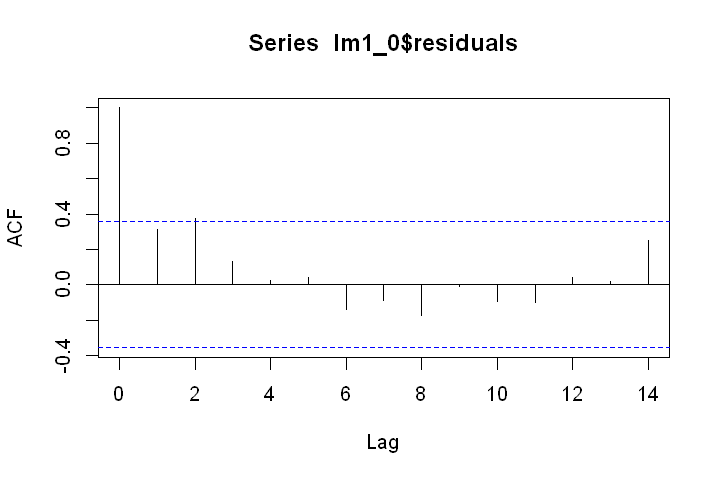

In [26]:
acf(lm1_0$residuals)

In [27]:
dwtest(lm1_0)


	Durbin-Watson test

data:  lm1_0
DW = 1.3325, p-value = 0.03153
alternative hypothesis: true autocorrelation is greater than 0


Por último, la prueba homogeneidad de varianza no detecta evidencia suficiente para rechazar la homocedasticidad ($\alpha=0.05$).

In [28]:
bptest(lm1)


	studentized Breusch-Pagan test

data:  lm1
BP = 0.74594, df = 1, p-value = 0.3878


En conclusión, si bien la no linealidad de los datos no es extrema, es posible detectarla en el análisis y es muy probablemente la causa de la autocorrelacion y la existencia de observaciones influyentes. 

Para explicar la variabilidad de los datos este modelo no es malo, pero si la finalidad es predecir, muy probablemente el modelo tendrá un error alto. El error no aparente puede estimarse empleando validacion cruzada, aunque la cantidad de datos disponibles es tan poca que las estimaciones no serían confiables. Sin embargo, sí puede servir para ilustrar la existencia de sesgo, debido a que el modelo es muy simple, y los datos requieren un modelo con una mayor complejidad.

Finalmente, se calcula la el error cuadrático medio (MSE) con el fin de compar el error aparente de los ajustes obtenidos.

In [422]:
print(paste("El MSE del modelo es",sum(lm1_0$residuals^2)/length(datos1$y)))

[1] "El MSE del modelo es 1.29391591575122"


Ahora, para el caso de los datos en el dataset con dos predictores, se tienen los siguientes resultados, gráficas diagnóstico, y pruebas estadísticas.

In [30]:
lm2 = lm(y~.,datos2)
summary(lm2)


Call:
lm(formula = y ~ ., data = datos2)

Residuals:
    Min      1Q  Median      3Q     Max 
-6027.3 -3213.3  -730.2  2496.8 10720.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6114.8     2527.9  -2.419   0.0226 *  
x1            2790.7     3347.6   0.834   0.4118    
x2            1675.6      288.9   5.801 3.58e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4676 on 27 degrees of freedom
Multiple R-squared:  0.5605,	Adjusted R-squared:  0.528 
F-statistic: 17.22 on 2 and 27 DF,  p-value: 1.512e-05


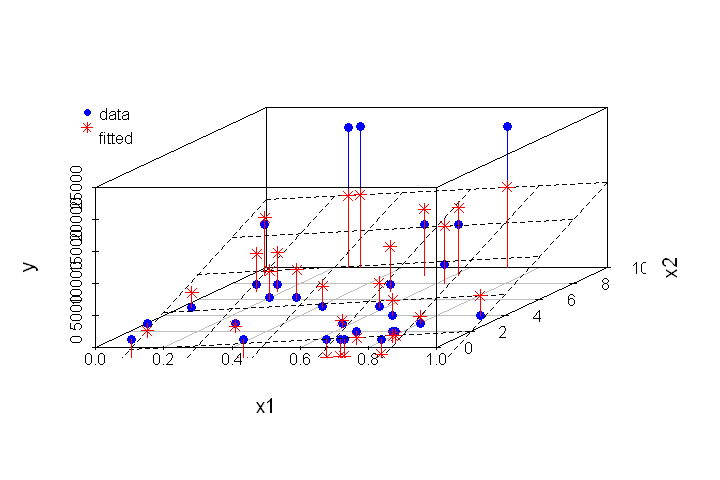

In [31]:
s3d = scatterplot3d(datos2,color = "blue",pch = 19,angle = 45,type="h")
s3d$plane3d(lm2)
s3d$points3d(datos2$x1, datos2$x2,-6114.8 + 2790.7*datos2$x1 + 1675.6*datos2$x2 ,
    col = "red", type = "h", pch = 8)
legend("topleft", legend = c("data","
fitted"),
  col = c("blue","red"),pch=c(19,8),cex=0.8,bty = "n")

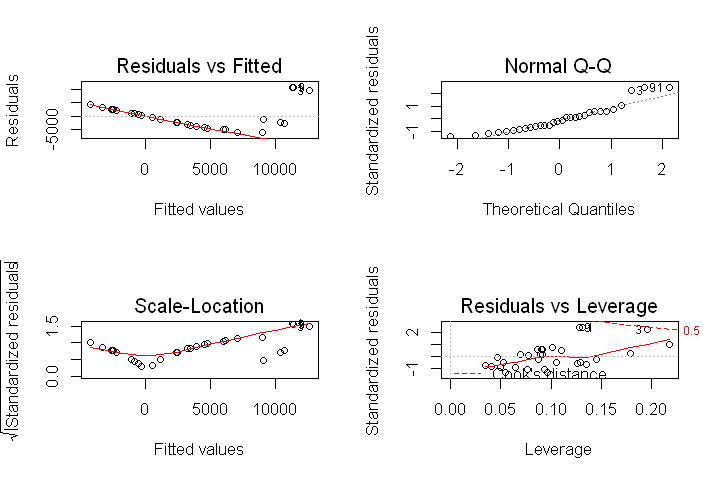

In [32]:
par(mfrow=c(2,2))
plot(lm2)

In [33]:
shapiro.test(lm2$residuals)


	Shapiro-Wilk normality test

data:  lm2$residuals
W = 0.90933, p-value = 0.01431


In [34]:
ad.test(lm2$residuals)


	Anderson-Darling normality test

data:  lm2$residuals
A = 0.75698, p-value = 0.04348


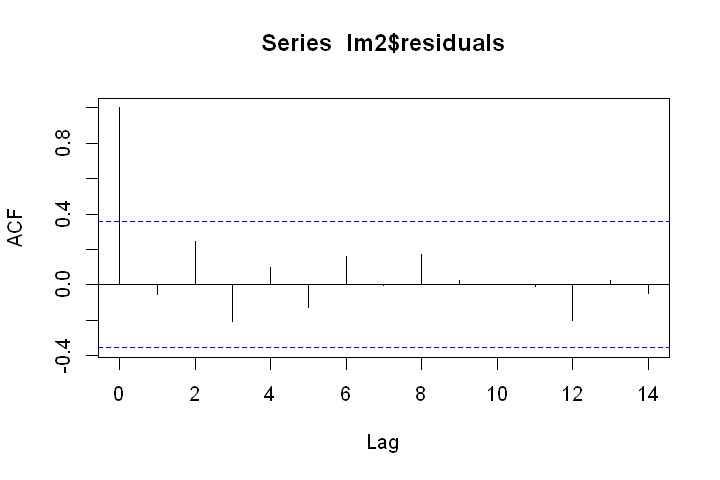

In [35]:
acf(lm2$residuals)

In [36]:
dwtest(lm2)


	Durbin-Watson test

data:  lm2
DW = 1.8757, p-value = 0.3764
alternative hypothesis: true autocorrelation is greater than 0


In [37]:
bptest(lm2)


	studentized Breusch-Pagan test

data:  lm2
BP = 12.196, df = 2, p-value = 0.002247


Contrario al análisis para los datos con un sólo predictor, en este caso los supuestos que se violan de acuerdo a las pruebas, son la normalidad y la homogeneidad de varianza. Ambos modelos parecen coincidir en el hecho de que la no linealidad es un problema y existen outliers precisamente debido al sesgo introducido por el modelo al considerar una forma tan simple para la relación $f$ en $Y=f(X_1,X_2)$.

De acuerdo al resumen del modelo, la regresión es significativa al nivel 0.05 de significancia, con la variable $x_1$ siendo no significativa de acuerdo a la prueba T. 

El MSE en este caso es extremadamente grande, dando evidencia del mal ajuste. 

In [421]:
print(paste("El MSE del modelo es",sum(lm2$residuals^2)/length(datos2$y)))

[1] "El MSE del modelo es 19680628.1508724"


***Parte 2: Regresión no paramétrica***

Los modelos de regresión no paramétrica son numerosos. Así que en esta sección se hará uso de únicamente un modelo para intentar ajustar mejor los datos que con un modelo lineal.

Los procesos Gaussianos son una poderosa herramienta que permite realizar regresiones en un contexto Bayesiano, definiendo una distribución a priori sobre funciones continuas (el proceso latente o señal) a través de distribuciones finito-dimensionales normales multivariadas

$$
P(f|X)=  N(f|\mu(X), K(X))
$$

Similarmente, la verosimilitud para los datos observados toma una forma Gaussiana

$$
P(Y|f,X) = N(Y|f,\sigma^2 I)
$$

donde $\sigma^2$ es la varianza del ruido.

$\mu(X)$ puede tomarse como constante o puede tener otra forma. Los elementos de la matriz de covarianzas $K(X)$ están dados en función de Kernels $k(\vec{x_i},\vec{x_j})$ donde $\vec{x_i}$ representa el vector de variables predictoras para la observación $i$.

A través de las conocidas propiedades condicionales de la distribución Gaussiana, es posible encontrar la distribución predictiva para un vector $Y^*$ de nuevas observaciones $P(Y^*|X,Y,X^*)$ que será tambien una Gaussiana con media y matriz de covarianzas determinadas por productos matriciales. La predicción se hace utilizando el MAP, en este caso la media.

La estructura de covarianza elegida para los datos será la obtenida por un kernel Gaussiano, cuya expresion general es

$$
k(\vec{x_i },\vec{x_j})=\sigma^2_f \exp\left(-\dfrac{1}{2}(\vec{x_i}-\vec{x_j})'M((\vec{x_i}-\vec{x_j}))\right)
$$

en este caso con $M=diag\left\{l_1^{-2},...,l_p^{-2}\right\}$ con $p$ el número de variables.

Para ajustar el modelo, los datos seran centrados y el proceso Gaussiano se propone de media cero, es decir, $\mu(X)=0$.

Los hiperparámetros (varianza del ruido y parámetros del kernel) denotados por $\theta$, son ajustados maximizando la log-verosimilitud marginal:

$$
P(Y|X,\theta) = -\dfrac{1}{2}Y'(K(X)+\sigma^2I)^{-1}Y - \dfrac{1}{2}\det(K(X)+\sigma^2I) - \dfrac{n}{2}\log 2\pi
$$

In [40]:
#Gaussian kernel function
#x,y: pair of data points
#a: variance of signal
#b: lenght scale in each dimension
#x,y, and b dimensions must match
GaussianKernel = function(x,y,a,b){
    x=as.vector(x)
    y=as.vector(y)
    b=as.vector(b)
  return(a*exp(-(1/2)*t((x-y))%*%((1/b^2)*diag(length(b)))%*%(x-y)))
}

In [41]:
#Gaussian kernel computations for conditional distribution
#x=matrix or data frame of inputs (each row corresponds to an observation), y=vector of observations, xnew=new point
#a,b: parameters of the Gaussian kernel
#variance: noise variance
GaussianCond = function(x,y,xnew,a,b,variance){
  x=as.matrix(x)  
  n=length(y)
  sigma = matrix(0,nrow = n,ncol=n)
  for(i in 1:n){
    for(j in 1:n){
      sigma[i,j] = GaussianKernel(x[i,],x[j,],a,b)
    }
  }
  s=numeric(n)
  for(i in 1:n){
    s[i]=GaussianKernel(xnew,x[i,],a,b)
  }
  invsigma = solve(sigma + variance*diag(n))
  mean = t(s) %*% invsigma %*% t(t(y))
  var = GaussianKernel(xnew,xnew,a,b) - (t(s) %*% invsigma %*% t(t(s))) + variance
  return(list(mean,var))
}

In [42]:
#Gaussian process prediction
#x: matrix or data frame of inputs (each row corresponds to an observation), y=vector of observations
#xnew: matrix or data frame of inputs (each row represents a different site) for predicted values
#a,b: parameters of the Gaussian kernel
#variance: noise variance
#alpha: 1-alpha probability interval
GaussianPred = function(x,y,xnew,a,b,variance,alpha){
  xnew=as.matrix(xnew)
  m=dim(xnew)[1]
  mu=numeric(m)
  vars=numeric(m)
  u=numeric(m)
  l=numeric(m)
  for(i in 1:m){
    G=GaussianCond(x,y,xnew[i,],a,b,variance)
    mu[i]=G[[1]]
    vars[i]=G[[2]]
  }
  vars[vars<0] = 0
  q=qnorm(1-(alpha/2),0,1)
  u=mu+q*sqrt(vars)
  l=mu-q*sqrt(vars)
  df=as.data.frame(cbind(xnew,mu,l,u))
  colnames(df) = c(colnames(xnew),"predictive mean","lower","upper")
  return(df)
}

Prueba de la funcion para puntos generados por un proceso Gaussiano:

In [43]:
#Gaussian kernel GP sampler in 1d
GaussianSampler = function(linf,lsup,n,a,b,variance){
  t = seq(from = linf,to = lsup,length.out = n)
  sigma = matrix(0,nrow = n,ncol=n)
  for(i in 1:n){
    for(j in 1:n){
      sigma[i,j] = GaussianKernel(t[i],t[j],a,b)
    }
  }
  x = mvrnorm(n=1, mu = rep(0,n), Sigma = sigma, tol = 1e-6, empirical = FALSE, EISPACK = FALSE) + rnorm(n,0,sqrt(variance))
  df=as.data.frame(cbind(t,x))
  colnames(df)=c("x","y")
  return(list(df,sigma))
}

Señal generada de un proceso Gaussiano con parámetros $\sigma_f^2=5$, $l=1$, $\sigma^2=0$ (sin ruido).

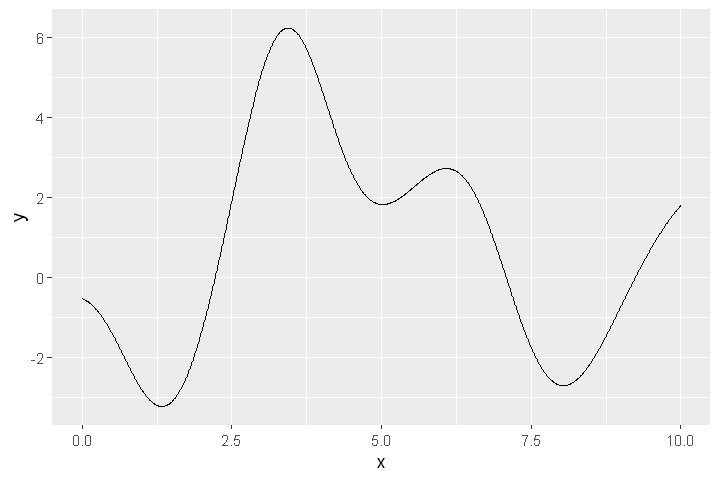

In [52]:
set.seed(20)
G=GaussianSampler(linf=0,lsup=10,n=1000,a=5,b=1,variance=0)[[1]]
ggplot(G) + geom_path(aes(x=x,y=y))

Tomamos una muestra de 30 puntos y les agregamos ruido de varianza 1. Con estos puntos, obtenemos la media predictiva e intervalos de credibilidad del 90\%:

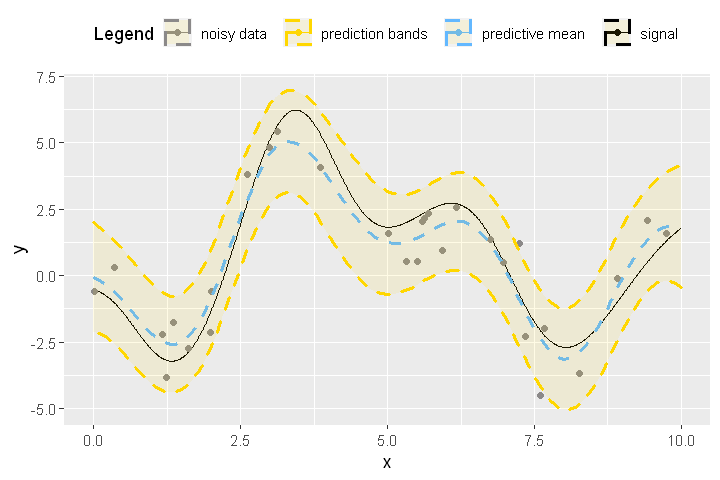

In [170]:
set.seed(302)
s = sample(x=1:dim(G)[1],size = 30,replace = FALSE)
Gs = G[s,]
Gs$y = Gs$y + rnorm(dim(Gs)[1],0,1)
P = GaussianPred(x=Gs$x,y=Gs$y,xnew=data.frame(x=seq(0,10,0.1)),a=5,b=1,variance=1,alpha=0.1)
colors <- c("signal" = "black", "noisy data" = "snow4", "predictive mean" = "steelblue1","prediction bands"="gold")
ggplot(G) + geom_path(aes(x=x,y=y,colour="signal")) + geom_point(data=Gs,aes(x=x,y=y,colour="noisy data")) + geom_path(data=P,aes(x=x,y=`predictive mean`,colour="predictive mean"),linetype="dashed",size=1) + 
geom_ribbon(data=P,aes(x=x,ymin=lower,ymax=upper,colour="prediction bands"),linetype="dashed",fill="gold",size=1,alpha=0.1) + scale_color_manual(values = colors) + labs(colour="Legend") +  theme(legend.position="top")

Como puede observarse, con un número limitado de puntos, es posible recuperar la forma de la senal de manera razonable, y las bandas de prediccion contienen a la mayoria de los puntos observados.

Antes de proceder al ajuste, es necesario optimizar la logverosimilitud marginal para estimar los hiperparametros. Esta función se programa y se emplea el solver `optim` con múltiples puntos iniciales, para encontrar el mejor óptimo debido a la no convexidad del problema de optimización.

In [247]:
#negative marginal loglikelihood function (1d)
#theta: vector of hyperparamters theta=(a,b,variance)
#x: vector of inputs
#y: data points
logL1d = function(theta,x,y){
  n=length(y)
  sigma = matrix(0,nrow = n,ncol=n)
  for(i in 1:n){
    for(j in 1:n){
      sigma[i,j] = GaussianKernel(x[i],x[j],theta[1],theta[2])
    }
  }
  K = sigma + theta[3]*diag(n)
  Kinv=solve(K)
   return(-( -(1/2)*t(y)%*%Kinv%*%y - (1/2)*log(det(K)) - (n/2)*log(2*pi)))
}

In [350]:
#negative marginal loglikelihood function (2d)
#theta: vector of hyperparamters theta=(a,b1,b2,variance)
#x: dataframe or matrix of inputs
#y: data points
logL2d = function(theta,x,y){
  x=as.matrix(x)
  n=length(y)
  sigma = matrix(0,nrow = n,ncol=n)
  for(i in 1:n){
    for(j in 1:n){
      sigma[i,j] = GaussianKernel(x[i,],x[j,],theta[1],c(theta[2],theta[3]))
    }
  }
  K = sigma + theta[4]*diag(n)
  Kinv=solve(K)
   return(-( -(1/2)*t(y)%*%Kinv%*%y - (1/2)*log(det(K)) - (n/2)*log(2*pi)))
}

Probemos el ajuste para los datos simulados en la grafica anterior, iniciando los hiperparámetros aleatoriamente:

In [251]:
set.seed(1000)
o=optim(c(runif(1,0,25),runif(1,0,10),runif(1,0,10)),logL1d,lower=c(0.001,0.001,0.001),upper=rep(Inf, 3),method="L-BFGS-B",x=Gs$x,y=Gs$y)

In [252]:
o

$par
[1] 7.0439134 0.8670517 0.9565029

$value
[1] 56.27506

$counts
function gradient 
      42       42 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

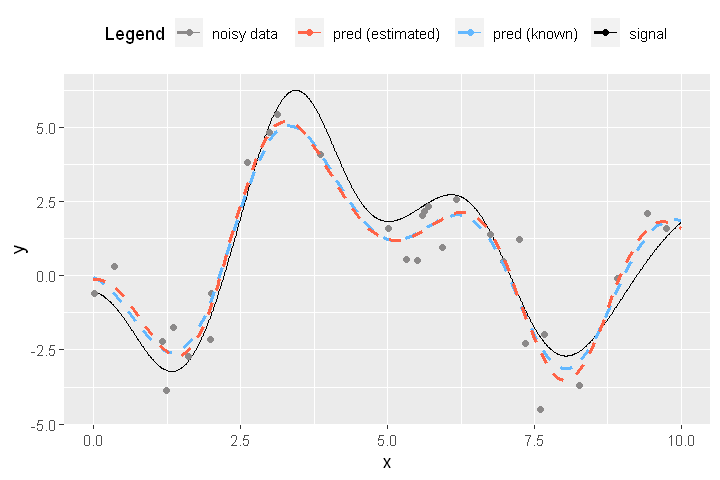

In [255]:
P2 = GaussianPred(x=Gs$x,y=Gs$y,xnew=data.frame(x=seq(0,10,0.1)),a=7.04391343947751,b=0.867051655216721,variance=0.956502880363104,alpha=0.1)
colors <- c("signal" = "black", "noisy data" = "snow4", "pred (known)" = "steelblue1","pred (estimated)"="tomato")
ggplot(G) + geom_path(aes(x=x,y=y,colour="signal")) + geom_point(data=Gs,aes(x=x,y=y,colour="noisy data")) + geom_path(data=P,aes(x=x,y=`predictive mean`,colour="pred (known)"),linetype="dashed",size=1) + 
geom_path(data=P2,aes(x=x,y=`predictive mean`,colour="pred (estimated)"),linetype="dashed",size=1) + scale_color_manual(values = colors) + labs(colour="Legend") +  theme(legend.position="top")

Comparando ambas predicciones, es claro que el ajuste por máxima verosimilitud marginal es bueno. Ambas predicciones son bastante similares. Si bien la predicción usando los hiperparámetros conocidos es ligeramente más cercana a la señal, la prediccion utilizando los hiperparámetros estimados parece ajustar un poco mejor a los datos. 

Una vez teniendo esta herramienta, se procede a estimar para el caso de los datos del primer dataset, centrando la variable respuesta antes del ajuste. Después del ajuste, se añade la media de las observaciones a las predicciones y bandas de predicción para regresar a los datos no centrados.

In [310]:
m=mean(datos1$y)
datos1$y = datos1$y-m
o=optim(c(50,10,10),logL1d,lower=c(0.001,0.001,0.001),upper=rep(Inf, 3),method="L-BFGS-B",x=datos1$x,y=datos1$y)

In [311]:
o

$par
[1] 354.72357618   0.91225291   0.08877391

$value
[1] 21.02872

$counts
function gradient 
     110      110 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

In [312]:
Pred_datos1 = GaussianPred(x=datos1$x,y=datos1$y,xnew=data.frame(x=seq(0,1,0.001)),a=354.723576181135,b=0.91225291377412,variance=0.0887739086028667,alpha=0.1)
datos1$y = datos1$y+m
Pred_datos1$`predictive mean` = Pred_datos1$`predictive mean`+m
Pred_datos1$lower = Pred_datos1$lower+m
Pred_datos1$upper = Pred_datos1$upper+m

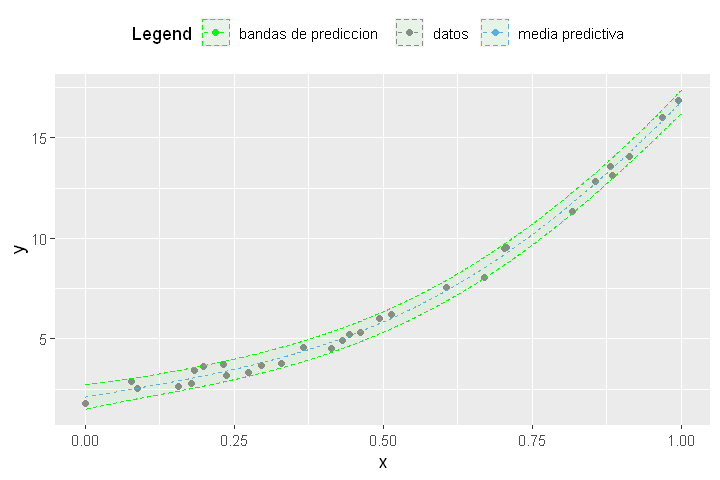

In [313]:
colors <- c("datos" = "snow4", "media predictiva" = "steelblue2", "bandas de prediccion"="green")
ggplot(datos1) + geom_point(aes(x=x,y=y,colour="datos")) + geom_path(data=Pred_datos1,aes(x=x,y=`predictive mean`,colour="media predictiva"),linetype="dashed",size=0.5) + 
geom_ribbon(data=Pred_datos1,aes(x=x,ymin=lower,ymax=upper,colour="bandas de prediccion"),linetype="dashed",fill="green",size=0.5,alpha=0.05) + scale_color_manual(values = colors) + labs(colour="Legend") +  theme(legend.position="top")

El nuevo MSE es mucho menor que el obtenido por la regresión lineal.

In [419]:
Pred_datos1_train=GaussianPred(x=datos1$x,y=datos1$y-m,xnew=data.frame(x=datos1$x),a=354.723576181135,b=0.91225291377412,variance=0.0887739086028667,alpha=0.1)
print(paste("El MSE del modelo es",sum((datos1$y-(Pred_datos1_train$`predictive mean`+m))^2)/length(datos1$y)))

[1] "El MSE del modelo es 0.0765705333534294"


Ahora, para el caso del dataset con dos predictores se tiene la siguiente estimación de los hiperparámetros $\theta = (\sigma_f^2,l_1,l_2,\sigma^2)$:

In [357]:
m2=mean(datos2$y)
o=optim(c(1000,1000,1,1000),logL2d,lower=c(0.001,0.001,0.001,0.001),upper=rep(Inf, 4),method="L-BFGS-B",x=datos2[c("x1","x2")],y=datos2$y-m2)

In [358]:
o

$par
[1] 2.006146e+07 3.986274e+03 8.757497e-01 1.466863e+02

$value
[1] 185.4317

$counts
function gradient 
     115      115 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

Con estos parametros, comparamos las predicciones con lo observado, primero a través de gráficos y posteriormente comparando las MSE.

In [360]:
Pred_datos2 = GaussianPred(x=datos2[c("x1","x2")],y=datos2$y-m2,xnew=datos2[c("x1","x2")],a=20061457.8258212,b=c(3986.27405454698,0.875749703837088),variance=146.68627604451,alpha=0.1)

La gráfica siguiente muestra que los valores ajustados y los observados son tan cercanos que debido a la escala tan grande del eje vertical, los puntos parecen estar uno encima de otro.

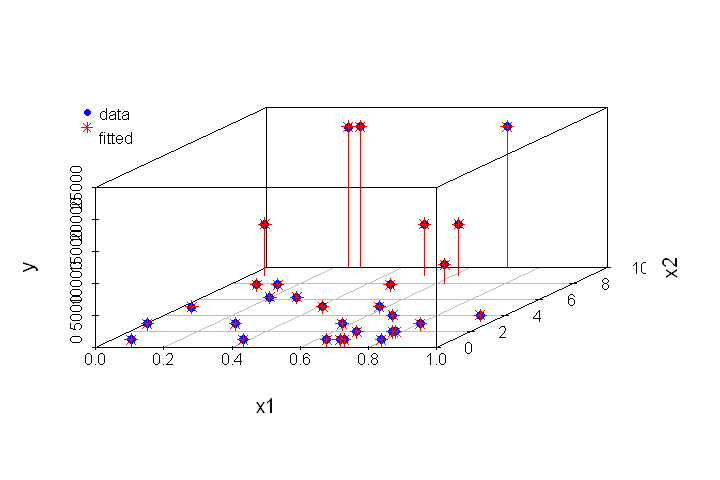

In [413]:
s3d_2 = scatterplot3d(datos2,color = "blue",pch = 19,angle = 45,type="h")
s3d_2$points3d(datos2$x1, datos2$x2,Pred_datos2$`predictive mean`+m2 ,
    col = "red", type = "h", pch = 8)
legend("topleft", legend = c("data","
fitted"),
  col = c("blue","red"),pch=c(19,8),cex=0.8,bty = "n")

In [386]:
superficie = function(x,y,x1,x2,a,b,variance,alpha){
    z = matrix(0,nrow=length(x1),ncol=length(x2))
    for(i in 1:length(x1)){
        for(j in 1:length(x2)){
            z[i,j] = GaussianPred(x=x,y=y,xnew=data.frame(x1=x1[i],x2=x2[j]),a=a,b=b,variance=variance,alpha=alpha)[[3]][1]
        }
    }
    return(z)
}

In [416]:
z=superficie(x=datos2[c("x1","x2")],y=datos2$y-m2,x1=seq(0,1,length.out = 100),x2=seq(1,10,length.out = 90),a=20061457.8258212,b=c(3986.27405454698,0.875749703837088),variance=146.68627604451,alpha=0.1)

Por otro lado, el siguiente gráfico muestra la superficie de regresión del proceso Gaussiano. La gráfica parece aproximar bien el comportamiento observado en los scatterplots en 3 dimensiones, y los diagramas de dispersión en dos dimensiones, de cada predictor contra la respuesta.

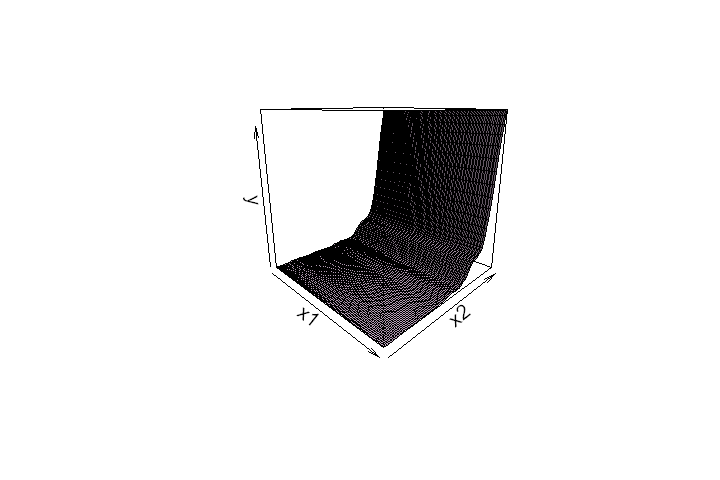

In [417]:
persp(x=seq(0,1,length.out = 100),y=seq(0,10,length.out = 90),z=z+m2,theta=45,col="thistle1",xlab = "x1",ylab = "x2",zlab = "y",shade=0.5)

Por último, calculamos el MSE del modelo y observamos la dramática reducción del MSE al comparar con el obtenido ajustando un modelo lineal.

In [420]:
print(paste("El MSE del modelo es",sum((datos2$y-(Pred_datos2$`predictive mean`+m2))^2)/length(datos2$y)))

[1] "El MSE del modelo es 97.7355400505492"


***Parte 3: Regresión no lineal***